In [3]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_roc_curve, roc_auc_score

mpl.rcParams['figure.figsize'] = (15.0, 6.0)
pd.set_option('max_columns', 30)

## Dataset Overview

In [4]:
# Read the preprocessed dataset
offers_df = pd.read_csv('./data/preprocessed_data.csv')
offers_df.head()

,person,offer,offer_completed,age,income,reward,difficulty,duration,days_since_registration,web,email,mobile,social,gender_M,gender_O,offer_type_discount
0,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,33.0,72000.0,5,5,5,461,1,1,1,1,1,0,0
1,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,33.0,72000.0,2,10,10,461,1,1,1,1,1,0,1
2,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,0,NaN,NaN,5,5,5,92,1,1,1,1,0,0,0
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,40.0,57000.0,5,20,10,198,1,1,0,0,0,1,1
4,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1,40.0,57000.0,3,7,7,198,1,1,1,1,0,1,1


## Model Comparison

In [5]:
# Create train test split
X = offers_df.drop(['person', 'offer', 'offer_completed'], axis=1)
y = offers_df['offer_completed']
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("Train set shape", X_train.shape)
print("Test set shape", X_test.shape)

Train set shape (29869, 13)
Test set shape (9957, 13)


In [6]:
# Impute missing values and standardize features
trans_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X_train = pd.DataFrame(trans_pipe.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(trans_pipe.transform(X_test), columns = X_train.columns)

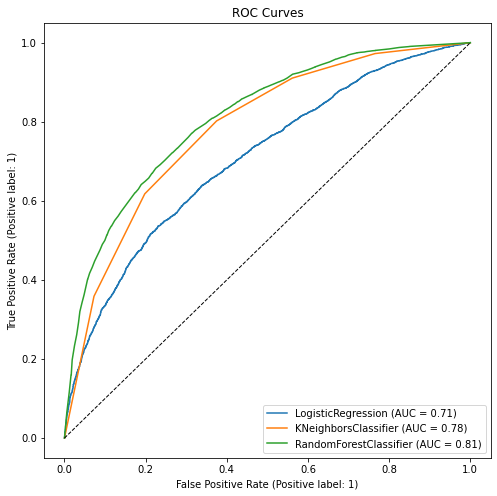

In [7]:
# Compare classifiers
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()]

fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("ROC Curves")
for model in models:
    model.fit(X_train, y_train)
    plot_roc_curve(model, X_test, y_test, ax=ax)
plt.plot([0,1], [0,1], 'black', lw=1, ls='--')
plt.show()

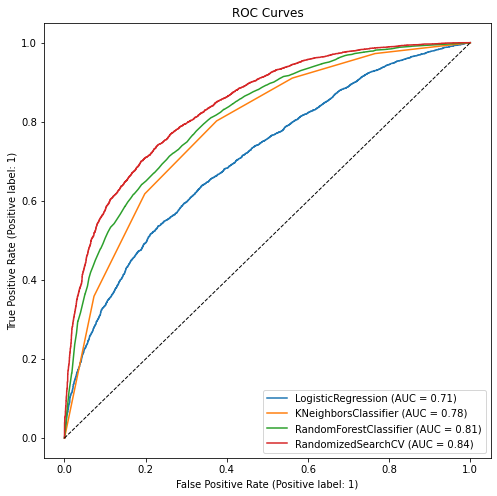

In [8]:
# Tune random forest classifier
params = {'bootstrap': [True, False],
          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, n_iter=20)

models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), cv]

fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("ROC Curves")
for model in models:
    model.fit(X_train, y_train)
    plot_roc_curve(model, X_test, y_test, ax=ax)
plt.plot([0,1], [0,1], 'black', lw=1, ls='--')
plt.show()